In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statistics

#we start with the import


In [24]:

#now we open the first csv file, we need to specify the separator because it's not a simple coma separator
df1 = pd.read_csv('steps.csv',sep=";")
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#we open the second csv
df2 = pd.read_csv('survey.csv')
df2

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0


In [26]:
#for the cleaning we only take value that are possible, for the weight it has to be between 30Kg and 595Kg according to what i found on internet

def cleaning(x):
    if(x > 595.0 ) or ( x < 30.0):
        return float('NaN')
    else:
        return x
df2['weight'] = df2['weight'].apply(cleaning)
df2['weight'].value_counts()

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
37.0      1
116.0     1
128.0     1
115.0     1
101.0     1
Name: weight, Length: 69, dtype: int64

In [27]:
#now i create the mean step per participant, i didn't quite understood if we needed to do it per day per participant or a global mean step in a year so i did both
row_sum= df1.sum(axis=1)
df1["mean_step_perParticipant"]= row_sum/df1.shape[1]
mean_step_perParticipant=row_sum.sum(axis=0)/df1.shape[1]
mean_step_perParticipant

2183773.4363636365

In [28]:
df1["mean_step_perParticipant"].head()

0    5118.273556
1    2817.787234
2    3734.525836
3     220.875380
4     871.914894
Name: mean_step_perParticipant, dtype: float64

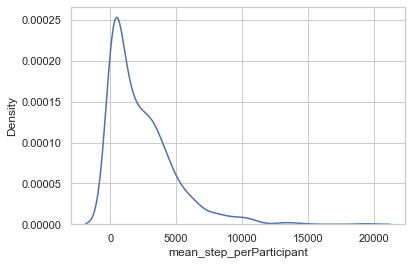

In [29]:

# Make default density plot
sns.kdeplot(df1["mean_step_perParticipant"])
plt.show()

In [30]:
#let's see the Summary statistics

df1["mean_step_perParticipant"].describe()

count      929.000000
mean      2357.815980
std       2424.618927
min          0.054711
25%        433.720365
50%       1694.908815
75%       3485.072948
max      19371.513678
Name: mean_step_perParticipant, dtype: float64

C:\Users\tomre\PycharmProjects\JupiterNotebook\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


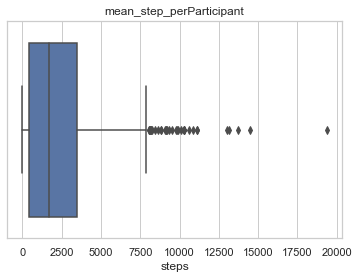

In [31]:
sns.boxplot(df1["mean_step_perParticipant"])
plt.title('mean_step_perParticipant')
plt.xlabel('steps')
plt.show()

not normaly distributed
right skewed
not normaly distributed
There is lots of outliers

In [32]:
#to make it easier to plot i will merge both datasets
df = pd.merge(df2, df1, on = 'id')

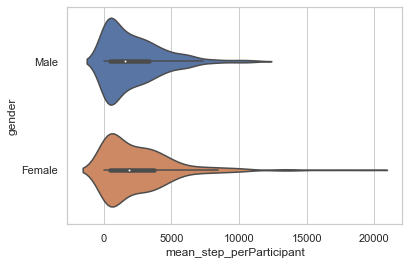

In [33]:
#we draw a violin plot of the mean step and the gender

sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=df["mean_step_perParticipant"],y=df["gender"])

we can see that there isn't that much difference between a majority of man and women
but the women that walk the most are walking more than the man that walk the most

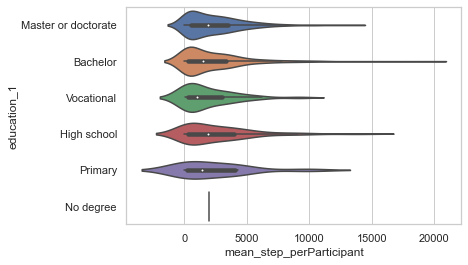

In [37]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=df["mean_step_perParticipant"],y=df["education_1"])

bachelors walk the most and vocational tend to walk less that all other education type